## `010`: Regressionin `scikit-learn`

Goals:
* practice with the `fit` and `predict` interface of sklearn models
* Get a visual sense of how different regression models work.

## Setup

Let's import necessary modules: Pandas and NumPy for data wrangling, Matplotlib for plotting, and some sklearn models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, log_loss, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

We'll load the data. We're using a dataset of home sale prices from the Ames, Iowa assessor's database, described in [this paper](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf).

In [2]:
ames = pd.read_csv('https://github.com/kcarnold/AmesHousing/blob/master/data/ames.csv.gz?raw=true', compression="gzip")
ames['price'] = ames["Sale_Price"] / 100_000 # Make `price` be in units of $100k, to be easier to interpret.
ames.head()

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude,price
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,None,0,5,2010,WD,Normal,215000,-93.619754,42.054035,2.150
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,None,0,6,2010,WD,Normal,105000,-93.619756,42.053014,1.050
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659,1.720
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,None,0,4,2010,WD,Normal,244000,-93.617320,42.051245,2.440
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,None,0,3,2010,WD,Normal,189900,-93.638933,42.060899,1.899


We'll define some functions to plot the data and models. Since we have latitude and longitude for each home, we can plot this data in 2D with a color for the sale price.

(Sorry, you'll just have to imagine there's a map underneath.)

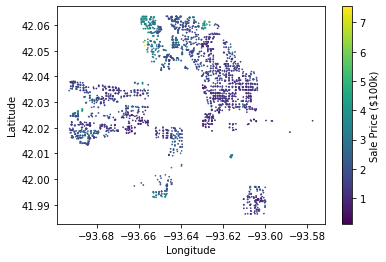

In [3]:
def plot_data():
    # You don't have to know how this function works.
    plt.scatter(ames['Longitude'], ames['Latitude'], c=ames["price"], s=.5)
    plt.xlabel("Longitude"); plt.ylabel("Latitude")
    plt.colorbar(label="Sale Price ($100k)")
plot_data()

We'll try to predict home price based on *location* (which the realtors assure us is the most important factor anyway). So we'll grab the Latitude and Longitude columns of the data. We'll call that input data `X`, by convention.

In [4]:
X = ames[['Longitude', 'Latitude']].values
X.shape

(2930, 2)

Our target, called `y` by convention, will be the home price (we'll soon introduce a different *y*, but start with this one).

In [5]:
y = ames['price'].values
y.shape

(2930,)

Notice that `X` has two axes and thus is written in uppercase; `y` has 1 and thus is written in lowercase. (This is `sklearn` convention; other libraries are less consistent about this.)

Now let's split the data into a `train` and `valid` set (which sklearn calls train-*test*, but that's fine). `random_state` is how `sklearn` specifies the random seed (it's actually slightly more flexible than a seed).

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=42)

We'll verify that the shapes make sense.

In [7]:
X_train.shape, y_train.shape

((2344, 2), (2344,))

In [8]:
X_valid.shape, y_valid.shape

((586, 2), (586,))

In [9]:
def plot_model(clf):
    lat_min = ames.Latitude.min()
    lat_max = ames.Latitude.max()
    lon_min = ames.Longitude.min()
    lon_max = ames.Longitude.max()
    price_min = ames.price.min()
    price_max = ames.price.max()

    xx, yy = np.meshgrid(np.linspace(lon_min, lon_max, 500), np.linspace(lat_min, lat_max, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(16, 8))
    plt.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.viridis, vmin=price_min, vmax=price_max)
    plt.scatter(ames['Longitude'], ames['Latitude'], c=ames["price"], s=1, cmap='viridis', vmin=price_min, vmax=price_max)#, edgecolors='k')
    plt.xlabel("Longitude"); plt.ylabel("Latitude")
    plt.colorbar(label="Sale Price ($100k)");


## Task

### Part A: Linear regression

1. Fit a linear regression model (call it `linreg`) to the training set (`X_train`, `y_train`).
2. Plot the model's predictions in data space. Describe the result qualitatively.
3. Compute the model's predictions on the validation set (call them `y_pred`). What does the model predict for the first house in the validation set? How does that compare with the actual price for that home?
4. Compute and show the mean squared error and the mean absolute error for the validation set predictions. You may use the `mean_absolute_error` and `mean_squared_error` functions that were imported from `sklearn.metrics` above.

**Fit a linear regression model (call it `linreg`) to the training set (`X_train`, `y_train`).**

In [10]:
linreg = LinearRegression().fit(X_train, y_train)

**Plot the model's predictions in data space. Describe the result qualitatively**. The code for step is filled in for you because there's not a generic way to do this; our approach here is customized to our particular model and task so you don't have to understand the details of how it works.

The important aspect of this step is the qualitative description of how this model compares with the decision tree models used later. So come back and write this description once you've also seen the decision tree model outputs.

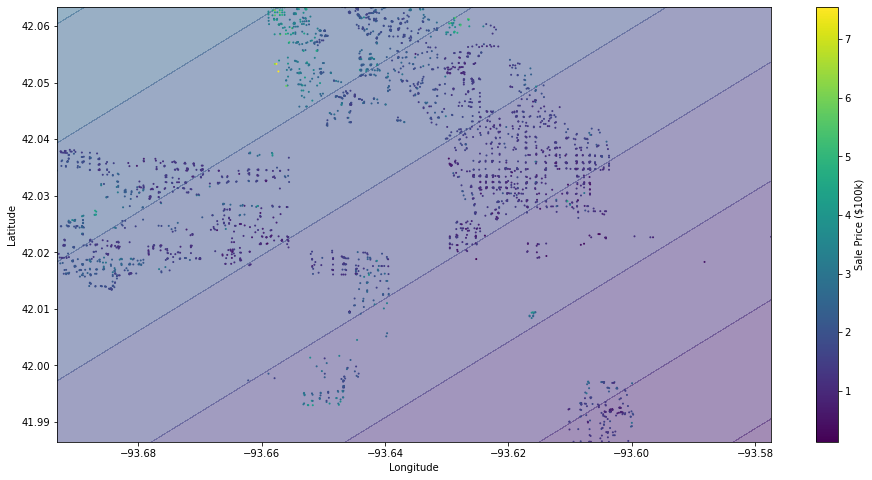

In [11]:
plot_model(linreg)

**Compute the model's predictions on the validation set (call them `y_pred`). What does the model predict for the first house in the validation set? How does that compare with the actual price for that home?**

In [12]:
# your code here
y_pred = linreg.predict(X_valid)
print("Prediction:", y_pred[0])
print("Actual:", y_valid[0])

Prediction: 1.5543284848404255
Actual: 1.61


**Compute and show the mean squared error and the mean absolute error for the validation set.**

* You may use the `mean_absolute_error` and `mean_squared_error` functions (imported from `sklearn.metrics` above).
* Use the predictions you already made above.
* Use Shift-TAB or `?` to get the documentation for these functions to ensure you're passing the arguments in the correct order.

In [13]:
# your code here
print("Mean absolute error:", mean_absolute_error(y_valid, y_pred))
print("Mean squared error:", mean_squared_error(y_valid, y_pred))

Mean absolute error: 0.5821366485782176
Mean squared error: 0.6786574994305041


### Part B: Decision tree regression

1. Fit a decision tree model (call it `dtree_reg`) to the training set.
2. Repeat steps 2 and 4 from Part A using this model.
3. Compare `dtree_reg` with `linreg`. Which is better? How can you tell?

**Fit a decision tree model (call it `dtree_reg`) to the training set (`X_train`, `y_train`).**

In [14]:
dtree_reg = DecisionTreeRegressor().fit(X_train, y_train)

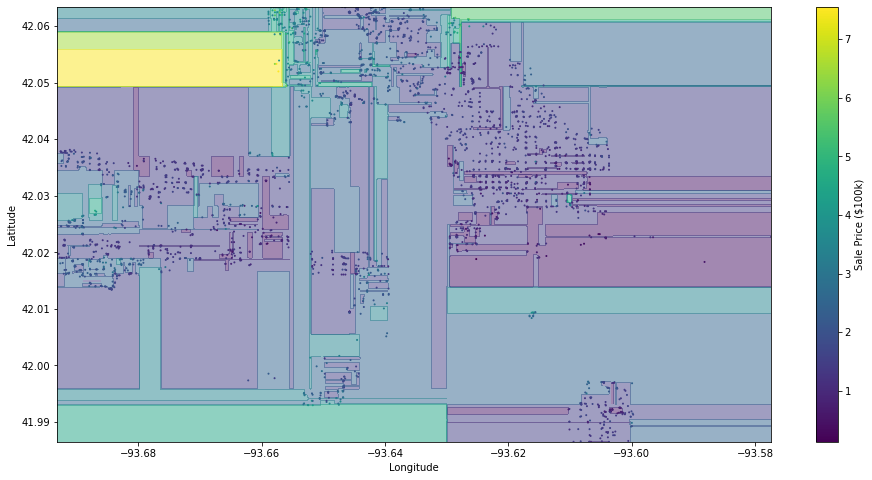

In [15]:
plot_model(dtree_reg)

In [16]:
y_pred = dtree_reg.predict(X_valid)
print("Mean absolute error:", mean_absolute_error(y_valid, y_pred))
print("Mean squared error:", mean_squared_error(y_valid, y_pred))

Mean absolute error: 0.3802076450511945
Mean squared error: 0.38558343769014036


### Part C: Random Forest regression

1. Fit a random forest regression model to this data.
2. Compare its performance quantitatively with the linear regression and decision tree models fit above.
3. Compare its data-space plot with the decision tree model. You might notice differences in the shapes of the boundaries it draws and, if you look more closely, a difference in how the boundaries relate to the data.

In [17]:
rf_reg = RandomForestRegressor().fit(X_train, y_train)

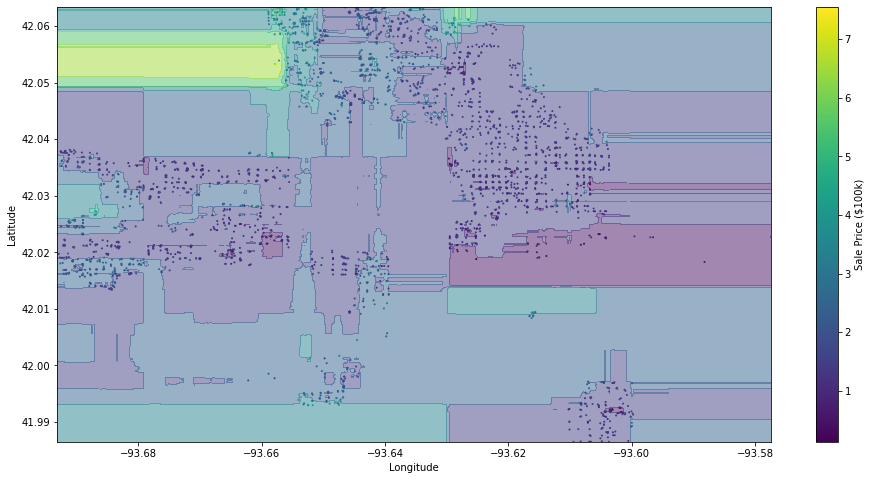

In [18]:
plot_model(rf_reg)

In [19]:
y_pred = rf_reg.predict(X_valid)
print("Mean absolute error:", mean_absolute_error(y_valid, y_pred))
print("Mean squared error:", mean_squared_error(y_valid, y_pred))

Mean absolute error: 0.28805975453203414
Mean squared error: 0.20157055769765275


### Part D: Classification!

Notice that the distribution of sale prices is skewed.

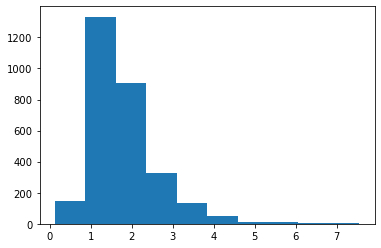

In [20]:
plt.hist(ames.price);

Skew can make regression hard because errors in the tails (in this case, the expensive houses) can dominate: mispredicting a million-dollar home by 1% is as bad as mispredicting a \$100k home by 10%!

One way to resolve this is to transform the target variable to be more evenly distributed. (For example, a log transformation will make all percentage errors equally important.) Another way is to transform it into a *classification* problem, where we predict whether the home price is *low*, *medium*, or *high*. We'll skip lots of nuance here and just split the prices into 3 equal buckets.

In [21]:
# This is some Pandas trickery. Enjoy, those who dare venture here! Otherwise don't worry about it.
ames['price_rank'] = ames.price.rank(pct=True)
ames['price_bin'] = 0 + (ames.price_rank > 1/3) + (ames.price_rank > 2/3)
ames.price_bin.value_counts()

0    981
1    980
2    969
Name: price_bin, dtype: int64

We'll need a new target variable, and thus a new train-test split. (We're keeping the same seed and dataset size, so the assignment of homes to train/valid should be the same if I'm not mistaken.)

In [22]:
y_clf = ames['price_bin'].values
X_train, X_valid, y_train_clf, y_valid_clf = train_test_split(X, y_clf, test_size=.2, random_state=42)

We could use our existing plotting mechanism (try it), but it's a bit confusing because the model will be predicting 0, 1, or 2, while the data is in the original range. That would also omit one cool thing we gain by moving to a classifier: we get *probabilities*! You can interpret that as the model's *confidence* about a home price prediction. We could do this with regression too, but it's more complex; it comes for free with classification.

Here we define the new plotting function; don't worry about how it works.

In [23]:
def plot_class_probs(clf):
    lat_min = ames.Latitude.min()
    lat_max = ames.Latitude.max()
    lon_min = ames.Longitude.min()
    lon_max = ames.Longitude.max()

    xx, yy = np.meshgrid(np.linspace(lon_min, lon_max, 500), np.linspace(lat_min, lat_max, 500))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])

    n_classes = Z.shape[1]
    fig, axs = plt.subplots(ncols=n_classes, figsize=(16, 6), sharey=True)
    for i, ax in enumerate(axs):
        contour = ax.contourf(xx, yy, Z[:, i].reshape(xx.shape), alpha=.5, cmap=plt.cm.RdBu_r)#, vmin=0., vmax=1.)
        ax.scatter(ames['Longitude'], ames['Latitude'], s=.5, color='k')
        ax.set(title=f"Class {i} probabilities", xlabel="Longitude")
    axs[0].set(ylabel="Latitude")
    fig.colorbar(contour, ax=ax, fraction=.05)

### Part 2A: Logistic Regression

Logistic regression is a classification algorithm, despite the name!

**Fit a logistic regression model (call it `logreg`) to our training set (`X_train` and `y_train_clf`).**

In [24]:
logreg = LogisticRegression().fit(X_train, y_train_clf)

Let's plot the class probabilities. Notice 

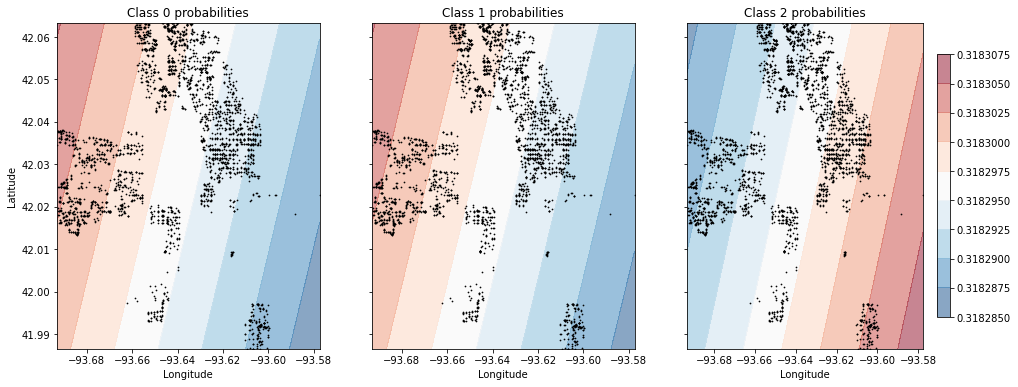

In [25]:
plot_class_probs(logreg)

**Compute the accuracy and cross-entropy loss.** You can use `accuracy_score` and `log_loss`. You'll need to use `predict_proba` for one of these (which one?) to ask the classifier to tell you its probabilities, not just its best guess.

In [26]:
# your code here
print("Accuracy:", accuracy_score(y_valid_clf, logreg.predict(X_valid)))
print("Log loss:", log_loss(y_valid_clf, logreg.predict_proba(X_valid)))

Accuracy: 0.2935153583617747
Log loss: 1.1027707941461928


### Part 2B: Decision tree classifier

**Fit a decision tree classifier (call it `dtree_clf`) to the training set**. Use the default hyperparameters.

In [27]:
dtree_clf = DecisionTreeClassifier().fit(X_train, y_train_clf)

Let's plot the probabilities for this classifier.

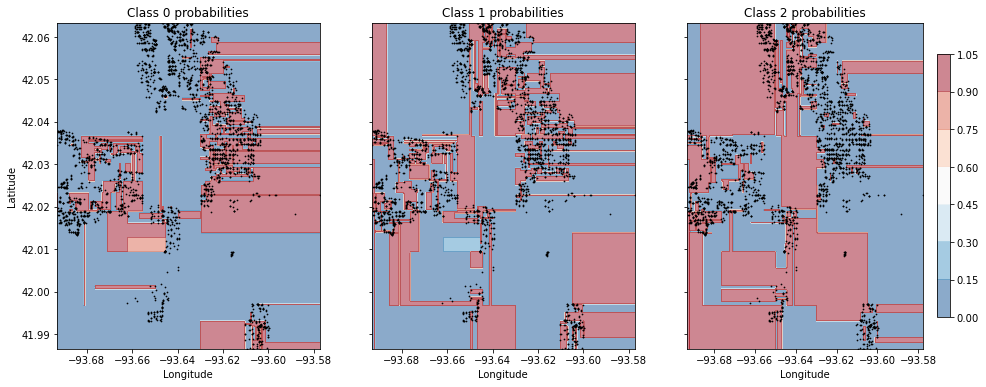

In [28]:
plot_class_probs(dtree_clf)

**Compute the accuracy and cross-entropy loss**. Be careful to use the correct classifier each time!

In [29]:
print("Accuracy:", accuracy_score(y_valid_clf, dtree_clf.predict(X_valid)))
print("Log loss:", log_loss(y_valid_clf, dtree_clf.predict_proba(X_valid)))

Accuracy: 0.7081911262798635
Log loss: 10.079032568407031


**How does the accuracy compare with the logistic regression?**

**How does the cross-entropy loss compare? Why might your prof have been slightly surprised to see that comparison at first? Why does it actually make sense?** You may need to come back to this one after you do the random forest.

### Part 3C: Random Forest

**Fit a random forest classifier to the training set.**

In [30]:
rf_clf = RandomForestClassifier().fit(X_train, y_train_clf)

**Describe, qualitatively, the class probability plots.**

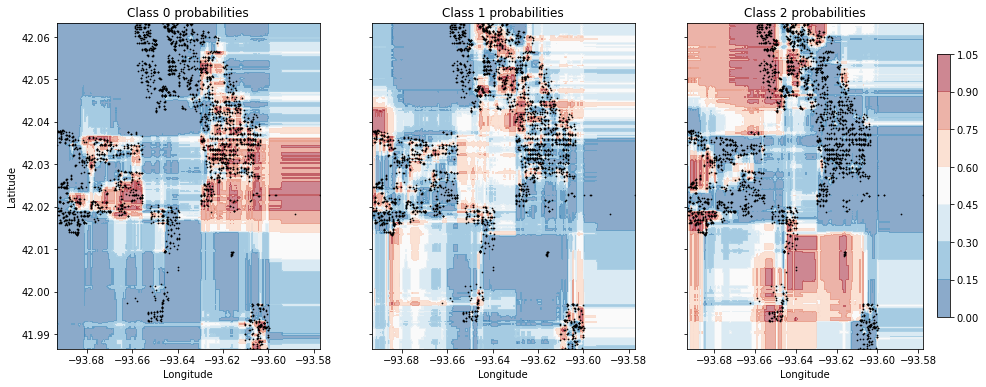

In [31]:
plot_class_probs(rf_clf)

**Compute the accuracy and cross-entropy loss**. Be careful to use the correct classifier each time!

In [32]:
print("Accuracy:", accuracy_score(y_valid_clf, rf_clf.predict(X_valid)))
print("Log loss:", log_loss(y_valid_clf, rf_clf.predict_proba(X_valid)))

Accuracy: 0.7525597269624573
Log loss: 0.8876497280313456


**How does the accuracy compare with the logistic regression and decision-tree classifiers?**

**How does the cross-entropy loss compare with the logistic regression and decision-tree classifiers?**

## Analysis